## Homework 05:

## Due Date: Mar 8, 2023, 4:00pm

#### Firstname Lastname: Tiffany Lin

#### E-mail: tl3493@nyu.edu

#### Enter your solutions and submit this notebook

---

### Part of Lecture 04

---

In [ ]:
!pip install line_profiler==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using iterators to traverse the grid
def iteration_gen(G):
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
    

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

    
def solve_heat_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

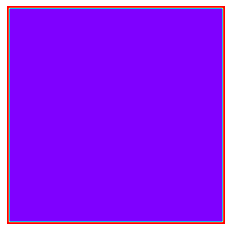

In [ ]:
size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

In [ ]:
%load_ext line_profiler
%lprun -f solve_heat_equation4 G4 = solve_heat_equation4(size_of_grid)

<ipython-input-2-f7b616fafb0b>:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.float("inf")


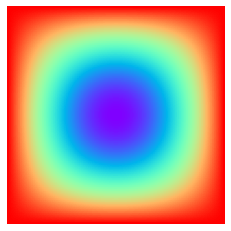

In [ ]:
plot_grid(G4)

Timer unit: 1e-06 s

Total time: 28.2432 s
File: <ipython-input-2-f7b616fafb0b>
Function: solve_heat_equation4 at line 42

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    42                                           def solve_heat_equation4(n):
    43                                               '''changing to both calc_error_np and iteration_gen functions'''
    44         1         52.0     52.0      0.0      G = build_grid(n)
    45         1         46.0     46.0      0.0      set_boundary_grid(G)
    46                                               
    47         1         21.0     21.0      0.0      G_prev = build_grid(n)
    48         1         44.0     44.0      0.0      copy_array(G, G_prev)
    49                                               
    50         1       2051.0   2051.0      0.0      error = np.float("inf")
    51       935       1725.0      1.8      0.0      while error > 1e-7:
    52       934   27923514.0  29896.7     98.9          iteration_gen(G)
    53       934     288800.0    309.2      1.0          error = calc_error_np(G, G_prev) 
    54       934      26938.0     28.8      0.1          copy_array(G, G_prev)          
    55         1          0.0      0.0      0.0      return(G)

# Problem 1. (100 points)


In Lecture 04 we considered the heat equation over a homogeneous material for which an iteration is given by the following equation:
$$
f_{i,j} = \frac{f_{i+1,j}+f_{i-1,j} + f_{i,j+1} + f_{i,j-1}}{4} \,.
$$

This was implemented by: 
```
# using iterators to traverse the grid
def iteration_gen(G):
"""the iteration function from lect04"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)
    for e in indices:
        G[e]=(G[e[0] + 1, e[1]] + G[e[0] - 1, e[1]] + G[e[0], e[1] + 1] + G[e[0], e[1] - 1])/4
```


----

Now imagine, you are given a non-homogeneous material for which the iteration, i.e. the corresponding equation,  depends on the position $(i, j)$ and is given by:
$$
f_{i,j} := \frac{ h_{i + 1,j} f_{i + 1, j} + h_{i - 1,j} f_{i - 1,j} + h_{i,j + 1} f_{i,j+1} + h_{i,j - 1} f_{i,j-1}}{ h_{i + 1,j} + h_{i - 1,j} + h_{i,j + 1} + h_{i,j - 1} } \,.
$$
Here "weight"
$$h(i, j) = \exp\left(-\frac{|i - j|} {\sqrt{n}}\right) \,,$$
corresponds to the point $(i, j)$, where $n$ is the size of the grid.

----

Write a new function:
```
def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
```
to solve the non-homogeneous case defined as above. 


The task here is to examine run-time improvements that can be obtained by Cython for this non-homogeneous material. Consider **solve_heat_equation4** from Lect04, which now becomes.

```
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)
    
    G_prev = build_grid(n)
    copy_array(G, G_prev)
    
    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)
```

----

Concretely, as presented in Lect05, perform the following steps and measure their run-times:

(i) simply compile the python code with Cython, without any changes;


(ii) introduce variables and arrays with ctypes (by using the command cdef);  


(iii) besides (ii), also use the content of ndarray objects in order to efficiently access the data buffer of the arrays.

---

In the sequel of the notebook, as your solution, submit codes, run-times, and plots of the following tasks:

**2.1 (30pt)** solve_heat_nonhomogeneous_equation4(100)

**2.2 (10pt)** solve_heat_nonhomogeneous_equation4(100) when applied (i)  

**2.3 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (ii)  

**2.4 (30pt)** solve_heat_nonhomogeneous_equation4(100) when applied (iii)  

Notice that to obtain a best performance for the heat equation you also need to apply (i), (ii), (iii) to the functions called within "solve_heat_equation4".


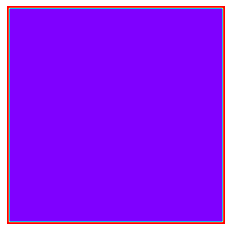

In [ ]:
size_of_grid = 100
G = build_grid(n=size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

### Part 1: solve_heat_equation4(100)

In [ ]:
import math
def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)

    for e in indices:
        f_right = G[e[0] + 1, e[1]]
        f_left = G[e[0] - 1, e[1]]
        f_up = G[e[0], e[1] + 1]
        f_down = G[e[0], e[1] - 1]

        h_right = math.exp(- abs((e[0] + 1) - e[1]) / math.sqrt(n))
        h_left = math.exp(- abs((e[0] - 1) - e[1]) / math.sqrt(n))
        h_up = math.exp(- abs(e[0] - (e[1] + 1)) / math.sqrt(n))
        h_down = math.exp(- abs(e[0] - (e[1] - 1)) / math.sqrt(n))

        num = (h_right * f_right) + (h_left * f_left) + (h_up * f_up) + (h_down * f_down)
        den = h_right + h_left + h_up + h_down

        G[e] = num / den

In [ ]:
def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)

    G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

<ipython-input-8-55a7ef3b79e3>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.float("inf")


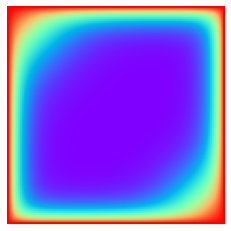

In [ ]:
%lprun -f solve_heat_nonhomogeneous_equation4 G = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Timer unit: 1e-06 s

Total time: 23.4628 s
File: <ipython-input-11-55a7ef3b79e3>
Function: solve_heat_nonhomogeneous_equation4 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def solve_heat_nonhomogeneous_equation4(n):
     2                                               '''changing to both calc_error_np and iteration_gen functions'''
     3         1         53.0     53.0      0.0      G = build_grid(n)
     4         1         38.0     38.0      0.0      set_boundary_grid(G)
     5                                           
     6         1         27.0     27.0      0.0      G_prev = build_grid(n)
     7         1         20.0     20.0      0.0      copy_array(G, G_prev)
     8                                           
     9         1       1859.0   1859.0      0.0      error = np.float("inf")
    10       310        557.0      1.8      0.0      while error > 1e-7:
    11       309   23355910.0  75585.5     99.5          iteration_gen_nonhomogeneous(G)
    12       309      92161.0    298.3      0.4          error = calc_error_np(G, G_prev) 
    13       309      12134.0     39.3      0.1          copy_array(G, G_prev)          
    14         1          0.0      0.0      0.0      return(G)

### Part 2: solve_heat_equation4(100) after applying (i)


In [ ]:
%load_ext Cython

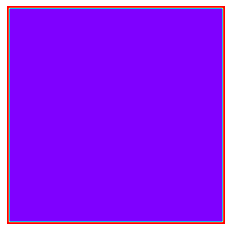

In [ ]:
# simply compile the python code with Cython, without any changes
%%cython

# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

import math
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n, n))
    return G

def set_boundary_grid(G):
    '''set the boundary values'''
    n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using numpy built-in functions to compute the error
def calc_error_np(G1, G2):
    error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(G1, G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous(G):
    """the iteration function in hw05"""
    n = G.shape[0]
    indices = product(range(1, n-1), repeat=2)

    for e in indices:
        f_right = G[e[0] + 1, e[1]]
        f_left = G[e[0] - 1, e[1]]
        f_up = G[e[0], e[1] + 1]
        f_down = G[e[0], e[1] - 1]

        h_right = math.exp(- abs((e[0] + 1) - e[1]) / math.sqrt(n))
        h_left = math.exp(- abs((e[0] - 1) - e[1]) / math.sqrt(n))
        h_up = math.exp(- abs(e[0] - (e[1] + 1)) / math.sqrt(n))
        h_down = math.exp(- abs(e[0] - (e[1] - 1)) / math.sqrt(n))

        num = (h_right * f_right) + (h_left * f_left) + (h_up * f_up) + (h_down * f_down)
        den = h_right + h_left + h_up + h_down

        G[e] = num / den

def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    G = build_grid(n)
    set_boundary_grid(G)

    G_prev = build_grid(n)
    copy_array(G, G_prev)

    error = np.float("inf")
    while error > 1e-7:
        iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)          
    return(G)

size_of_grid = 100
G = build_grid(size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

<string>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


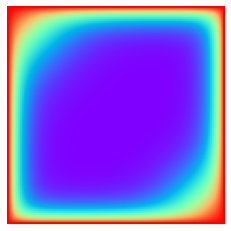

In [ ]:
%lprun -f solve_heat_nonhomogeneous_equation4 G = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Timer unit: 1e-06 s

Total time: 12.5934 s
File: /root/.cache/ipython/cython/_cython_magic_b52c827b1d573ea994135091a9800d05.pyx
Function: solve_heat_nonhomogeneous_equation4 at line 61

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    61                                           def solve_heat_nonhomogeneous_equation4(n):
    62                                               '''changing to both calc_error_np and iteration_gen functions'''
    63         1         91.0     91.0      0.0      G = build_grid(n)
    64         1         35.0     35.0      0.0      set_boundary_grid(G)
    65                                           
    66         1         22.0     22.0      0.0      G_prev = build_grid(n)
    67         1         20.0     20.0      0.0      copy_array(G, G_prev)
    68                                           
    69         1        929.0    929.0      0.0      error = np.float("inf")
    70         1          2.0      2.0      0.0      while error > 1e-7:
    71       309   12379618.0  40063.5     98.3          iteration_gen_nonhomogeneous(G)
    72       309     195521.0    632.8      1.6          error = calc_error_np(G, G_prev) 
    73       309      17171.0     55.6      0.1          copy_array(G, G_prev)          
    74         1          1.0      1.0      0.0      return(G)

### Part 3: solve_heat_equation4(100) after applying (ii)

In [ ]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


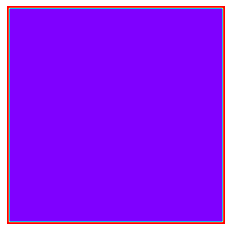

In [ ]:
#introduce variables and arrays with ctypes (by using the command cdef)
%%cython

# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

import math
from itertools import product
import numpy as np
cimport numpy as np # need to import special compile-time information
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    cdef np.ndarray G = np.zeros([n, n], dtype=float)
    return G

def set_boundary_grid(np.ndarray G):
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(np.ndarray G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray G1, np.ndarray G2):
    cdef float error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray G1, np.ndarray G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous(np.ndarray G):
    """the iteration function in hw05"""
    cdef int n = G.shape[0]
    #indices = product(range(1, n-1), repeat=2) # Got rid of this python implementation, instead I used a nested for loop with cdef variables 
    cdef int i, j 

    cdef float f_right
    cdef float f_left
    cdef float f_up
    cdef float f_down
    cdef float h_right
    cdef float h_left
    cdef float h_up
    cdef float h_down
    cdef float num
    cdef float den

    for i in range(1, n-1):
        for j in range(1, n-1): 
            f_right = G[i + 1, j]
            f_left = G[i - 1, j]
            f_up = G[i, j + 1]
            f_down = G[i, j - 1]

            h_right = math.exp(- abs((i + 1) - j) / math.sqrt(n))
            h_left = math.exp(- abs((i - 1) - j) / math.sqrt(n))
            h_up = math.exp(- abs(i - (j + 1)) / math.sqrt(n))
            h_down = math.exp(- abs(i - (j - 1)) / math.sqrt(n))

            num = (h_right * f_right) + (h_left * f_left) + (h_up * f_up) + (h_down * f_down)
            den = h_right + h_left + h_up + h_down

            G[i, j] = num / den

    return G

def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray G = build_grid(n)
    set_boundary_grid(G)

    cdef np.ndarray G_prev = build_grid(n)
    copy_array(G, G_prev)

    cdef float error = np.float("inf")
    while error > 1e-7:
        G = iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)      
    return(G)

size_of_grid = 100
G = build_grid(size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

<string>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


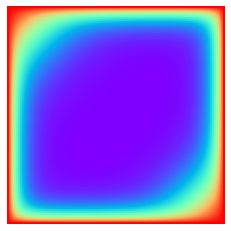

In [ ]:
%lprun -f solve_heat_nonhomogeneous_equation4 G = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Timer unit: 1e-06 s

Total time: 10.8671 s
File: /root/.cache/ipython/cython/_cython_magic_d63f6ce9242bde0fda993b5c1d9b10d6.pyx
Function: solve_heat_nonhomogeneous_equation4 at line 76

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    76                                           def solve_heat_nonhomogeneous_equation4(n):
    77                                               '''changing to both calc_error_np and iteration_gen functions'''
    78         1         57.0     57.0      0.0      cdef np.ndarray G = build_grid(n)
    79         1         33.0     33.0      0.0      set_boundary_grid(G)
    80                                           
    81         1         27.0     27.0      0.0      cdef np.ndarray G_prev = build_grid(n)
    82         1         18.0     18.0      0.0      copy_array(G, G_prev)
    83                                           
    84         1       1048.0   1048.0      0.0      cdef float error = np.float("inf")
    85         1          2.0      2.0      0.0      while error > 1e-7:
    86       309   10695072.0  34611.9     98.4          G = iteration_gen_nonhomogeneous(G)
    87       309     159224.0    515.3      1.5          error = calc_error_np(G, G_prev) 
    88       309      11587.0     37.5      0.1          copy_array(G, G_prev)      
    89         1          2.0      2.0      0.0      return(G)

### Part 4: solve_heat_equation4(100) after applying (iii)

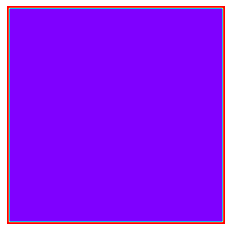

In [ ]:
# beside introducing variables and arrays with ctypes (by using the command cdef) 
# also use the content of ndarray objects in order to efficiently access the data buffer of the arrays.
%%cython

# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1
# cython: profile=True

import math
from itertools import product
import numpy as np
cimport numpy as np # need to import special compile-time information
import matplotlib.pyplot as plt

def build_grid(n):
    '''defines the grid'''
    cdef np.ndarray[double, ndim=2] G = np.zeros([n, n], dtype=float) # added efficient indexing with special buffer syntax
    return G

def set_boundary_grid(np.ndarray[double, ndim=2] G): # parameters also use efficient indexing with special buffer syntax now
    '''set the boundary values'''
    cdef int n = G.shape[0]
    G[:,  0] = 1.0
    G[0,  :] = 1.0
    G[-1, :] = 1.0
    G[:, -1] = 1.0

def plot_grid(np.ndarray[double, ndim=2] G):
    img = plt.imshow(G)
    img.set_cmap('rainbow')
    plt.axis('off')
    plt.show()

# using numpy built-in functions to compute the error
def calc_error_np(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    cdef float error = np.square(np.subtract(G1, G2)).mean()
    return(error)

# deep copy of G1 to G2
def copy_array(np.ndarray[double, ndim=2] G1, np.ndarray[double, ndim=2] G2):
    G2[:, :] = G1[:, :]

def iteration_gen_nonhomogeneous(np.ndarray[double, ndim=2] G):
    """the iteration function in hw05"""
    cdef int n = G.shape[0]
    cdef int i, j 

    cdef float f_right
    cdef float f_left
    cdef float f_up
    cdef float f_down
    cdef float h_right
    cdef float h_left
    cdef float h_up
    cdef float h_down
    cdef float num
    cdef float den

    for i in range(1, n-1):
        for j in range(1, n-1): 
            f_right = G[i + 1, j]
            f_left = G[i - 1, j]
            f_up = G[i, j + 1]
            f_down = G[i, j - 1]

            h_right = math.exp(- abs((i + 1) - j) / math.sqrt(n))
            h_left = math.exp(- abs((i - 1) - j) / math.sqrt(n))
            h_up = math.exp(- abs(i - (j + 1)) / math.sqrt(n))
            h_down = math.exp(- abs(i - (j - 1)) / math.sqrt(n))

            num = (h_right * f_right) + (h_left * f_left) + (h_up * f_up) + (h_down * f_down)
            den = h_right + h_left + h_up + h_down

            G[i, j] = num / den

    return G

def solve_heat_nonhomogeneous_equation4(n):
    '''changing to both calc_error_np and iteration_gen functions'''
    cdef np.ndarray[double, ndim=2] G = build_grid(n)
    set_boundary_grid(G)

    cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    copy_array(G, G_prev)

    cdef float error = np.float("inf")
    while error > 1e-7:
        G = iteration_gen_nonhomogeneous(G)
        error = calc_error_np(G, G_prev) 
        copy_array(G, G_prev)      
    return(G)

size_of_grid = 100
G = build_grid(size_of_grid)
set_boundary_grid(G)
plot_grid(G) 

<string>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


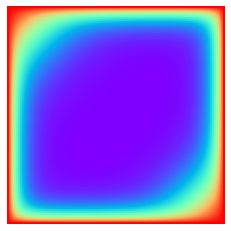

In [ ]:
%lprun -f solve_heat_nonhomogeneous_equation4 G = solve_heat_nonhomogeneous_equation4(size_of_grid)
plot_grid(G)

### HERE COPY-PASTE THE OUTPUT FROM LINE-PROFILER:

Timer unit: 1e-06 s

Total time: 8.45143 s
File: /root/.cache/ipython/cython/_cython_magic_f82c15d9c8264317b8a2a7b4565dd827.pyx
Function: solve_heat_nonhomogeneous_equation4 at line 78

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    78                                           def solve_heat_nonhomogeneous_equation4(n):
    79                                               '''changing to both calc_error_np and iteration_gen functions'''
    80         1         78.0     78.0      0.0      cdef np.ndarray[double, ndim=2] G = build_grid(n)
    81         1         29.0     29.0      0.0      set_boundary_grid(G)
    82                                           
    83         1         19.0     19.0      0.0      cdef np.ndarray[double, ndim=2] G_prev = build_grid(n)
    84         1         18.0     18.0      0.0      copy_array(G, G_prev)
    85                                           
    86         1        994.0    994.0      0.0      cdef float error = np.float("inf")
    87         1          2.0      2.0      0.0      while error > 1e-7:
    88       224    8330184.0  37188.3     98.6          G = iteration_gen_nonhomogeneous(G)
    89       224     112260.0    501.2      1.3          error = calc_error_np(G, G_prev) 
    90       224       7845.0     35.0      0.1          copy_array(G, G_prev)      
    91         1          2.0      2.0      0.0      return(G)